In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import re
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import tiktoken

print("E23CSEU2321")
print("LAB-4")


E23CSEU2320
LAB-4
All packages imported successfully!


In [2]:
text = """
trees are an essential part of the natural environment.
they provide oxygen and absorb carbon dioxide from the atmosphere.
forests help regulate the climate and maintain ecological balance.
different types of trees grow in different regions of the world.
some trees remain green throughout the year while others shed their leaves seasonally.

roots anchor the tree firmly into the soil.
they absorb water and essential minerals needed for growth.
the trunk supports the structure and transports nutrients.
branches spread outward to hold leaves and fruits.
leaves perform photosynthesis using sunlight water and carbon dioxide.
this process produces food for the tree and releases oxygen.

trees provide shelter for many birds insects and animals.
they prevent soil erosion by holding the ground together.
shade from trees reduces heat in urban areas.
fruits from trees are an important source of nutrition.
wood from trees is used for building furniture and paper.

planting trees helps combat climate change.
afforestation and reforestation increase green cover.
trees improve air quality and reduce pollution levels.
they also enhance the beauty of landscapes and parks.
many communities organize tree plantation drives.

trees have cultural and spiritual significance in many societies.
some species are considered sacred and protected.
ancient trees can live for hundreds of years.
growth rings in the trunk reveal information about age and climate.
studying trees helps scientists understand environmental changes.

conservation of forests is necessary for biodiversity.
illegal logging threatens many ecosystems.
sustainable practices ensure long term forest health.
education about environmental protection is important.
protecting trees today secures a healthier planet for future generations.
"""


# PART 1: N-GRAM MODEL



PART 1: N-GRAM MODEL
Total tokens: 261
Total unique contexts: 249

N-gram Predictions:
artificial intelligence -> None
intelligence is -> None
is transforming -> None
raghava is -> None

Generated text:
artificial intelligence


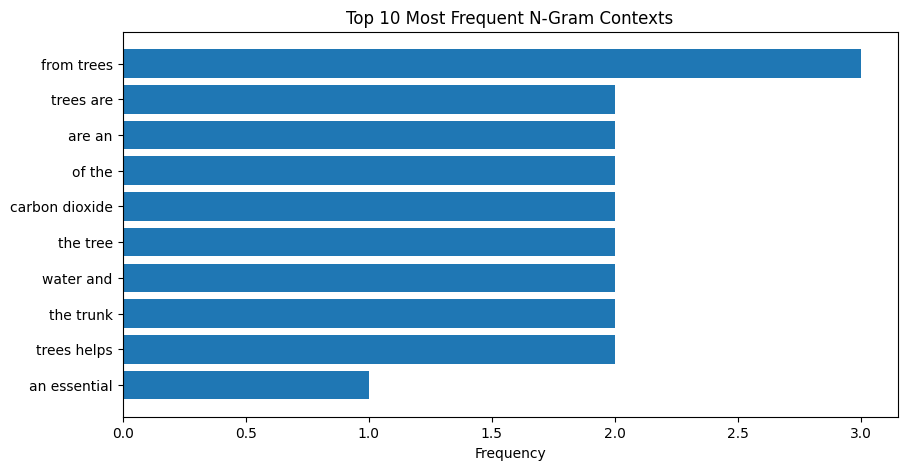

In [3]:
print("\n" + "="*50)
print("PART 1: N-GRAM MODEL")
print("="*50)

# Preprocessing
corpus = text.lower()
corpus = re.sub(r'[^a-z\s]', '', corpus)
tokens = corpus.split()
print("Total tokens:", len(tokens))

# Build n-gram model
n = 3
ngram_model = defaultdict(list)

for i in range(len(tokens) - n + 1):
    context = tuple(tokens[i:i+n-1])
    next_word = tokens[i+n-1]
    ngram_model[context].append(next_word)

print("Total unique contexts:", len(ngram_model))

# Prediction function
def predict_next_word(context):
    context = tuple(context.lower().split())
    if context in ngram_model:
        return random.choice(ngram_model[context])
    else:
        return None

# Test predictions
print("\nN-gram Predictions:")
print("artificial intelligence ->", predict_next_word("artificial intelligence"))
print("intelligence is ->", predict_next_word("intelligence is"))
print("is transforming ->", predict_next_word("is transforming"))
print("raghava is ->", predict_next_word("raghava is"))

# Text generation function
def generate_text_ngram(seed_text, length=30):
    words = seed_text.lower().split()

    for _ in range(length):
        context = tuple(words[-(n-1):])
        if context in ngram_model:
            words.append(random.choice(ngram_model[context]))
        else:
            break

    return " ".join(words)

# Generate text
print("\nGenerated text:")
print(generate_text_ngram("artificial intelligence", 20))

# Visualization
context_counts = Counter({k: len(v) for k, v in ngram_model.items()})
top_contexts = context_counts.most_common(10)

labels = [' '.join(k) for k, _ in top_contexts]
values = [v for _, v in top_contexts]

plt.figure(figsize=(10,5))
plt.barh(labels, values)
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent N-Gram Contexts")
plt.gca().invert_yaxis()
plt.show()


# PART 2: RNN MODEL



PART 2: RNN MODEL
Vocabulary size: 169
X shape: (256, 5)
y shape: (256,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training RNN...
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0019 - loss: 5.1285    
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1864 - loss: 5.0516 
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2921 - loss: 4.9622 
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2020 - loss: 4.8272 
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1020 - loss: 4.6346 
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0996 - loss: 4.4080 
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1499 - loss: 4.1066 
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2915 - loss: 3.7402 
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3784 - loss: 3.2307 
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5255 - loss: 2.7879 
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6225 - loss: 2.3839 
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.70

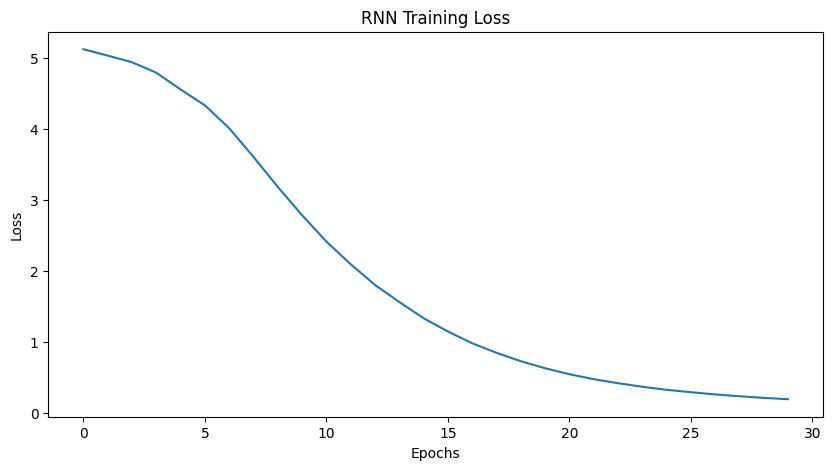

In [4]:
print("\n" + "="*50)
print("PART 2: RNN MODEL")
print("="*50)

# Clean text
corpus = text.lower()
corpus = re.sub(r'[^a-z\s]', '', corpus)
tokens = corpus.split()

# Vocabulary
vocab = sorted(set(tokens))
word_to_id = {w:i for i,w in enumerate(vocab)}
id_to_word = {i:w for w,i in word_to_id.items()}
vocab_size = len(vocab)

print(f"Vocabulary size: {vocab_size}")

# Encode corpus
encoded = [word_to_id[w] for w in tokens]

# Create sequences
seq_len = 5
X, y = [], []

for i in range(len(encoded) - seq_len):
    X.append(encoded[i:i+seq_len])
    y.append(encoded[i+seq_len])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

# Build RNN model
rnn_model = Sequential([
    Embedding(vocab_size, 64, input_length=seq_len),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])

rnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

rnn_model.summary()

# Train RNN
print("\nTraining RNN...")
history = rnn_model.fit(
    X, y,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Text generation function for RNN
def generate_text_rnn(model, seed_text, steps=30):
    words = seed_text.lower().split()

    for _ in range(steps):
        # Get last seq_len words
        seq = [word_to_id.get(w, 0) for w in words[-seq_len:]]
        seq = np.array(seq).reshape(1, -1)

        pred = np.argmax(model.predict(seq, verbose=0))
        words.append(id_to_word[pred])

    return " ".join(words)

# Generate text with RNN
print("\nRNN Generated text:")
print(generate_text_rnn(rnn_model, "artificial intelligence", 20))

# Plot training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RNN Training Loss")
plt.show()


PART 3: LSTM MODEL

In [5]:
print("\n" + "="*50)
print("PART 3: LSTM MODEL")
print("="*50)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

print(f"Total words: {total_words}")

# Create input sequences
input_sequences = []
for line in text.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

# Pad sequences
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Create X and y
X_lstm = input_sequences[:, :-1]
y_lstm = input_sequences[:, -1]
y_lstm = tf.keras.utils.to_categorical(y_lstm, num_classes=total_words)

print(f"X shape: {X_lstm.shape}")
print(f"y shape: {y_lstm.shape}")

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(total_words, 64, input_length=max_seq_len-1))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(total_words, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

# Train LSTM
print("\nTraining LSTM...")
lstm_history = lstm_model.fit(X_lstm, y_lstm, epochs=200, verbose=1)

# Text generation function for LSTM
def generate_text_lstm(model, seed_text, next_words=30):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word

    return seed_text

# Generate text with LSTM
print("\nLSTM Generated text:")
print(generate_text_lstm(lstm_model, "artificial intelligence", 20))

# =====================================================
# PART 4: TRANSFORMER MODEL WITH PYTORCH
# =====================================================

print("\n" + "="*50)
print("PART 4: TRANSFORMER MODEL")
print("="*50)

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Prepare data for Transformer
corpus_clean = text.lower()
corpus_clean = re.sub(r'[^a-z\s]', '', corpus_clean)
tokens_list = corpus_clean.split()

# Build vocabulary
vocab_set = sorted(set(tokens_list))
word2idx = {w: i for i, w in enumerate(vocab_set)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size_transformer = len(vocab_set)

print(f"Vocabulary size: {vocab_size_transformer}")

# Encode tokens
encoded_tokens = [word2idx[w] for w in tokens_list]

# Create sequences
context_size = 5
X_trans = []
Y_trans = []

for i in range(len(encoded_tokens) - context_size):
    X_trans.append(encoded_tokens[i:i+context_size])
    Y_trans.append(encoded_tokens[i+1:i+context_size+1])

X_trans = torch.tensor(X_trans, dtype=torch.long)
Y_trans = torch.tensor(Y_trans, dtype=torch.long)

print(f"X shape: {X_trans.shape}")
print(f"Y shape: {Y_trans.shape}")

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(1)]

# Transformer Language Model
class TransformerLanguageModel(nn.Module):
    def __init__(
        self,
        vocab_size,
        d_model=128,
        n_heads=4,
        n_layers=2,
        ff_dim=512,
        dropout=0.1
    ):
        super().__init__()

        self.token_embedding = nn.Embedding(vocab_size, d_model)
        self.positional_embedding = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True
        )

        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=n_layers
        )

        self.fc_out = nn.Linear(d_model, vocab_size)

    def forward(self, x):
        x = self.token_embedding(x)
        x = self.positional_embedding(x)

        seq_len = x.size(1)
        causal_mask = torch.triu(
            torch.ones(seq_len, seq_len),
            diagonal=1
        ).bool().to(x.device)

        x = self.transformer_encoder(x, mask=causal_mask)
        logits = self.fc_out(x)
        return logits

# Initialize model
model = TransformerLanguageModel(vocab_size_transformer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("\nModel initialized!")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

# Training
print("\nTraining Transformer...")
epochs = 10
batch_size = 64

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for i in range(0, len(X_trans), batch_size):
        xb = X_trans[i:i+batch_size].to(device)
        yb = Y_trans[i:i+batch_size].to(device)

        optimizer.zero_grad()

        outputs = model(xb)

        loss = criterion(
            outputs.view(-1, vocab_size_transformer),
            yb.view(-1)
        )

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")

# Text generation function for Transformer
def generate_text_transformer(
    start_text,
    max_tokens=50,
    temperature=0.8
):
    model.eval()

    words = start_text.lower().split()
    ids = [word2idx[w] for w in words if w in word2idx]

    if len(ids) == 0:
        ids = [0]

    input_ids = torch.tensor(ids).unsqueeze(0).to(device)

    for _ in range(max_tokens):
        with torch.no_grad():
            outputs = model(input_ids)
            logits = outputs[:, -1, :] / temperature
            probs = F.softmax(logits, dim=-1)

            next_id = torch.multinomial(probs, num_samples=1)

        input_ids = torch.cat([input_ids, next_id], dim=1)

    generated = " ".join(idx2word[i.item()] for i in input_ids[0])
    return generated

# Generate text with Transformer
print("\nTransformer Generated text:")
print(generate_text_transformer("artificial intelligence", max_tokens=40, temperature=0.8))
print(generate_text_transformer("machine learning", max_tokens=40, temperature=0.7))



PART 3: LSTM MODEL
Total words: 170
X shape: (230, 12)
y shape: (230, 170)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM...
Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0282 - loss: 5.1346
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0766 - loss: 5.1139 
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0789 - loss: 5.0539 
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0687 - loss: 4.8591 
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0491 - loss: 4.7529 
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0649 - loss: 4.7985 
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0622 - loss: 4.7649 
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0912 - loss: 4.6874 
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0971 - loss: 4.6598 
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0906 - loss: 4.6176
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1375 - loss: 4.4840 
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc

In [6]:
print("\n" + "="*50)
print("LAB 4 COMPLETED SUCCESSFULLY!")
print("="*50)
print("\nModels implemented:")
print("1. N-gram Model (3-gram)")
print("2. RNN Model (SimpleRNN)")
print("3. LSTM Model")
print("4. Transformer Model (PyTorch)")
print("\nAll models trained and tested!")


All models trained and tested!
